In [1]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/MyDrive/cv-corpus-22.0-delta-2025-06-20-en.tar.gz'

In [19]:
import tarfile, os, shutil, pandas as pd

file_path = '/content/drive/MyDrive/cv-corpus-22.0-delta-2025-06-20-en.tar.gz'
with tarfile.open(file_path, "r:gz") as tar:
    tar.extractall(path='/content/')
    print("تم فك الضغط في /content/")

تم فك الضغط في /content/


In [20]:
!ls /content
!ls /content/cv-corpus-22.0-delta-2025-06-20/en

cv-corpus-22.0-delta-2025-06-20  drive	my_random_500_samples  sample_data
clip_durations.tsv  other.tsv		       validated_sentences.tsv
clips		    reported.tsv	       validated.tsv
invalidated.tsv     unvalidated_sentences.tsv


In [6]:
!pip install git+https://github.com/openai/whisper.git
import whisper
model = whisper.load_model("small")
audio_file = os.path.join(output_dir, samples.iloc[0]['path']) # Assuming you want to transcribe the first sampled audio
result = model.transcribe(audio_file)
print("Transcription:", result["text"])

  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-5asmfm0a
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-5asmfm0a
  Resolved https://github.com/openai/whisper.git to commit c0d2f624c09dc18e709e37c2ad90c039a4eb72a2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━

100%|███████████████████████████████████████| 461M/461M [00:08<00:00, 55.2MiB/s]


Transcription:  In this phase the party was based in eastern Norway.


In [31]:
import os

base_path = "/content/cv-corpus-22.0-delta-2025-06-20/en"
files_in_dir = os.listdir(base_path)
print("Files in directory:")
for file in files_in_dir:
    print(file)

# Identify potential record files
record_files = [f for f in files_in_dir if f.endswith('.tsv') and any(keyword in f for keyword in ['validated', 'invalidated', 'other', 'reported'])]
print("\nPotential record TSV files:")
for file in record_files:
    print(file)

Files in directory:
other.tsv
reported.tsv
clip_durations.tsv
unvalidated_sentences.tsv
validated_sentences.tsv
validated.tsv
invalidated.tsv
clips

Potential record TSV files:
other.tsv
reported.tsv
unvalidated_sentences.tsv
validated_sentences.tsv
validated.tsv
invalidated.tsv


In [32]:
dfs = []
for file in record_files:
    file_path = os.path.join(base_path, file)
    df = pd.read_csv(file_path, sep='\t')
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)
display(combined_df.head())

,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment,reason,source,is_used,clips_count
0,e192d7cd52e62566150a257e0d993b5b0a03ba298311c8...,common_voice_en_42696072.mp3,f889b83dc83795676e7d33fd96e09079512211dd61f9cb...,But then something even more extraordinary hap...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN
1,5e408ba4e2f9562f17efc82c2c7d3d91f2b53729e4506c...,common_voice_en_42696165.mp3,f88dd711b7b99232fdb1fe93556c2c21a9ff0c36bdf1da...,The division was then commanded by Major Gener...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN
2,5e408ba4e2f9562f17efc82c2c7d3d91f2b53729e4506c...,common_voice_en_42696166.mp3,f8990814817b6b84c2d9f7f44992b6ce1455ae8c751a7b...,"Her husband was Li Shi, the last emperor of Ch...",NaN,0.0,0.0,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN
3,5e408ba4e2f9562f17efc82c2c7d3d91f2b53729e4506c...,common_voice_en_42696167.mp3,f88e6e1e48bb514d9da92b461eeb6826b9aed1220a973a...,"London advances against Ludington, Michigan, c...",NaN,0.0,0.0,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN
4,5e408ba4e2f9562f17efc82c2c7d3d91f2b53729e4506c...,common_voice_en_42696168.mp3,f88fa2e6d0ab1f9f71d798176d3b5ae5439180931f1371...,But his books were never best-sellers.,NaN,0.0,0.0,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN


**Reasoning**:
Merge the combined DataFrame with the clip durations DataFrame.



In [33]:
durations_path = os.path.join(base_path, "clip_durations.tsv")
durations_df = pd.read_csv(durations_path, sep='\t')
durations_df = durations_df.rename(columns={'clip': 'path'})
combined_df = pd.merge(combined_df, durations_df, on='path')
display(combined_df.head())

,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment,reason,source,is_used,clips_count,duration[ms]
0,e192d7cd52e62566150a257e0d993b5b0a03ba298311c8...,common_voice_en_42696072.mp3,f889b83dc83795676e7d33fd96e09079512211dd61f9cb...,But then something even more extraordinary hap...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,7416
1,5e408ba4e2f9562f17efc82c2c7d3d91f2b53729e4506c...,common_voice_en_42696165.mp3,f88dd711b7b99232fdb1fe93556c2c21a9ff0c36bdf1da...,The division was then commanded by Major Gener...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,7020
2,5e408ba4e2f9562f17efc82c2c7d3d91f2b53729e4506c...,common_voice_en_42696166.mp3,f8990814817b6b84c2d9f7f44992b6ce1455ae8c751a7b...,"Her husband was Li Shi, the last emperor of Ch...",NaN,0.0,0.0,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,4536
3,5e408ba4e2f9562f17efc82c2c7d3d91f2b53729e4506c...,common_voice_en_42696167.mp3,f88e6e1e48bb514d9da92b461eeb6826b9aed1220a973a...,"London advances against Ludington, Michigan, c...",NaN,0.0,0.0,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,5508
4,5e408ba4e2f9562f17efc82c2c7d3d91f2b53729e4506c...,common_voice_en_42696168.mp3,f88fa2e6d0ab1f9f71d798176d3b5ae5439180931f1371...,But his books were never best-sellers.,NaN,0.0,0.0,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,2880


In [37]:
for _, row in samples.iterrows():
    src = os.path.join(clips_path, row['path'])
    dst = os.path.join(output_dir, row['path'])
    try:
        shutil.copyfile(src, dst)
    except FileNotFoundError:
        print(f"Warning: Clip file not found for path: {row['path']}")
        continue

In [38]:
samples.to_csv(os.path.join(output_dir, 'metadata.csv'), index=False)

In [45]:
!pip install -q openai-whisper jiwer
!sudo apt -q update && sudo apt -q install -y ffmpeg

import whisper
model = whisper.load_model("large")
metadata_path = os.path.join(output_dir, "metadata.csv")
audio_folder = output_dir
output_path = os.path.join(audio_folder, "whisper_transcripts.csv")

df = pd.read_csv(metadata_path)
transcripts = []

for _, row in df.iterrows():
    file_path = os.path.join(audio_folder, row['path'])
    result = model.transcribe(file_path, language="en")
    transcripts.append({
        "file": row['path'],
        "original_sentence": row['sentence'],
        "transcribed_text": result['text'],
        "confidence": result.get("avg_logprob", None)
    })

df_trans = pd.DataFrame(transcripts)

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists...
Building dependency tree...
Reading state information...
42 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does no

100%|█████████████████████████████████████| 2.88G/2.88G [00:44<00:00, 68.6MiB/s]


In [46]:
from jiwer import wer

df_trans['wer'] = df_trans.apply(lambda row: wer(row['original_sentence'], row['transcribed_text']), axis=1)

/tmp/ipython-input-47-3472900171.py:10: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


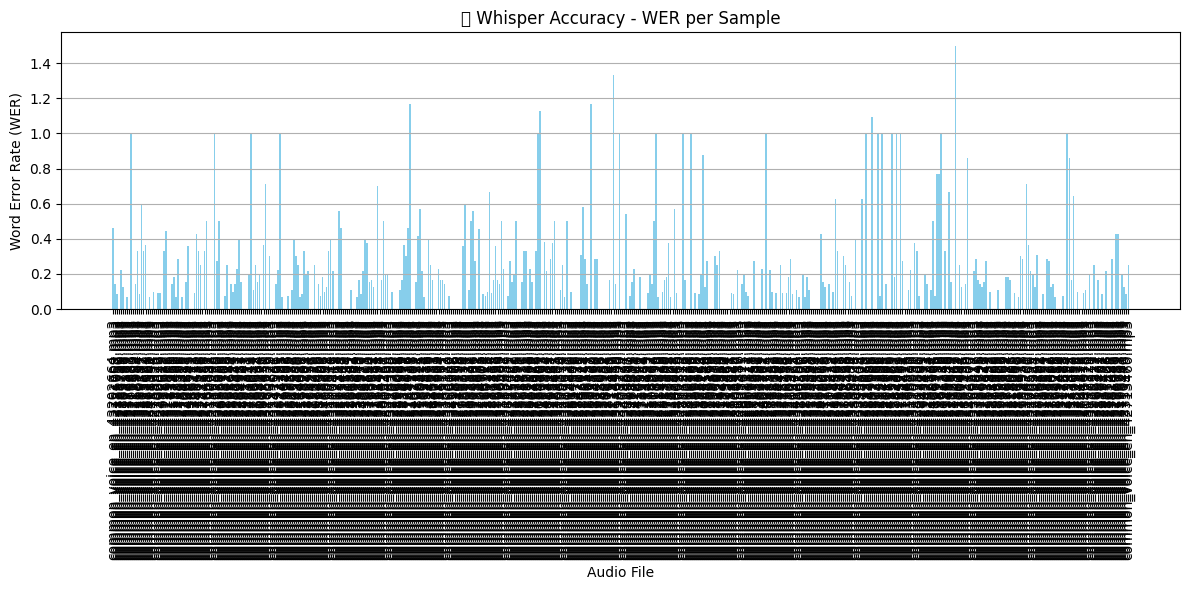

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(df_trans['file'], df_trans['wer'], color='skyblue')
plt.xticks(rotation=90)
plt.ylabel("Word Error Rate (WER)")
plt.xlabel("Audio File")
plt.title("🔍 Whisper Accuracy - WER per Sample")
plt.grid(axis='y')
plt.tight_layout()
plt.show()